[[0.         0.4        0.4        0.         0.2       ]
 [0.66666667 0.         0.33333333 0.         0.        ]
 [0.5        0.25       0.         0.25       0.        ]
 [0.         0.         0.5        0.         0.5       ]
 [0.5        0.         0.         0.5        0.        ]]


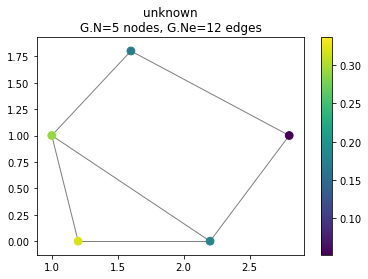

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from pygsp import *

Adj=np.zeros((5,5))

Adj[0][1]=2/5
Adj[0][2]=2/5
Adj[0][4]=1/5
Adj[1][0]=2/3
Adj[1][2]=1/3
Adj[2][0]=1/2
Adj[2][1]=1/4
Adj[2][3]=1/4
Adj[3][2]=1/2
Adj[3][4]=1/2
Adj[4][0]=1/2
Adj[4][3]=1/2


Coord1=np.zeros((5,2))
Coord1[0][0]=1
Coord1[0][1]=1
Coord1[1][0]=1.2
Coord1[1][1]=0
Coord1[2][0]=2.2
Coord1[2][1]=0
Coord1[3][0]=2.8
Coord1[3][1]=1
Coord1[4][0]=1.6
Coord1[4][1]=1.8

x = np.zeros((1,5))

x[0][0] = 0.29
x[0][1] = 0.32
x[0][2] = 0.18
x[0][3] = 0.05
x[0][4] = 0.17

G = graphs.Graph(Adj)
G.set_coordinates(Coord1)
plotting.plot_signal(G, x, vertex_size = 60)

print(Adj)

[ 1.          0.38954499 -0.82903578 -0.11613713 -0.44437207] 

 [[-0.4472136  -0.19364442  0.40263668 -0.25297583 -0.35323588]
 [-0.4472136  -0.40342739 -0.17824386 -0.16039175  0.7446223 ]
 [-0.4472136  -0.08417052 -0.36196174  0.56183397 -0.28619631]
 [-0.4472136   0.65956342  0.57328744  0.40534426  0.47056005]
 [-0.4472136   0.59802977 -0.58858987 -0.65598501 -0.13201118]]


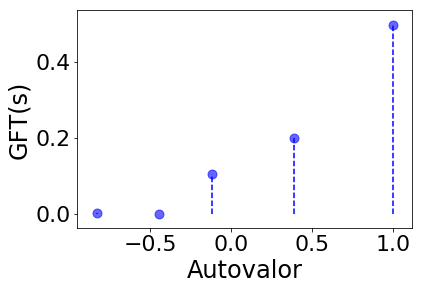

In [4]:
from gspy import *

fsize = 24 # plot axis font size
msize = 14 # marker size
csize = fsize - 2 # colorbar label size
graph_node_size = 80

eigvals,V = np.linalg.eig(Adj)

Vinv = np.linalg.inv(V)

eigval_abs_max = np.max(np.abs(eigvals))

index_eig_sort = np.argsort(np.abs(eigvals - eigval_abs_max))

ss = np.dot(Vinv,x.transpose()) #GFT

# A GFT é plotada
plt.figure()

stem(eigvals[index_eig_sort],np.abs(ss[index_eig_sort]),fsize=18,msize=8,color='b',linestyle='--',labelstr=0,alph=0.6)

plt.xlabel('Autovalor',fontsize=fsize)
plt.ylabel('GFT(s)',fontsize=fsize)
plt.tick_params(labelsize=fsize-2)
plt.axis('tight')

print(eigvals,"\n\n",V)

#p = np.where(np.abs(ss) > 0.1)
#print(ss,p[0])

In [12]:
e = np.where(np.abs(ss) > 0.1)

V2 = V[:,:][:,e[0]] #I don't know why, but the article recommends to choose the two first vectors. Making sense for
#me to choose the spectral components with nonzero GFT components 

#sM = np.zeros((3,5)) 

#sM[0][0] = 1
#sM[1][1] = 1
#sM[2][3] = 1

So = np.zeros((len(e[0]),len(V2))) 
for i in range(len(e[0])):
    So[i][i] = 1


C = np.dot(So,V2)
C = np.linalg.inv(C)

R = np.dot(V2,C)

print(R)

[[ 1.00000000e+00 -1.16178640e-17  4.98583231e-17]
 [ 1.59694870e-16  1.00000000e+00  5.48690097e-17]
 [ 3.01536231e-16 -2.64829348e-16  1.00000000e+00]
 [ 3.24243771e+00 -3.44141762e+00  1.19897991e+00]
 [ 4.86831439e+00 -3.80619414e+00 -6.21202560e-02]]


In [13]:
xM = np.dot(So,x.transpose()) 

x_n = np.dot(R,xM)
print(x_n)

[[0.29      ]
 [0.32      ]
 [0.18      ]
 [0.05486968]
 [0.1826474 ]]


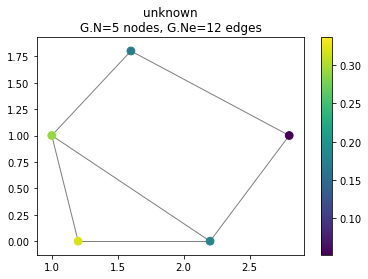

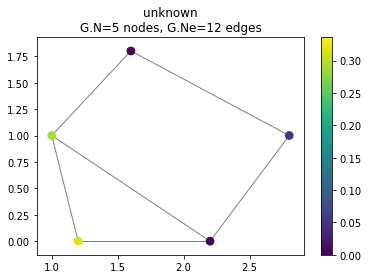

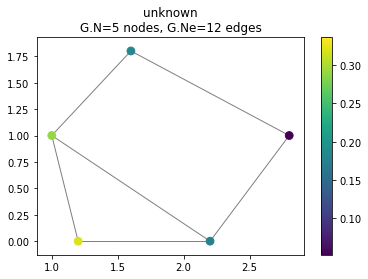

In [64]:
xM_ = np.zeros((1,5))
aux = 0
for i in range(5):
    if np.sum(sM[:,i]) == True:  
        xM_[0][i] = xM[aux]
        aux = aux + 1

plotting.plot_signal(G, x, vertex_size = 60)
plotting.plot_signal(G, xM_, vertex_size = 60)
plotting.plot_signal(G, x_n, vertex_size = 60)

In [36]:
from itertools import combinations 
import operator

def optimal_sampling_operator(M,V2):
    a = np.zeros((1,len(V2)))
    b = np.zeros((len(V2),len(V2)))

    for j in range(len(V2)):
        a[0,j] = 1
        b[j] = a
        a = np.zeros((1,len(V2)))

    cb = np.arange(len(V2))
    comb = combinations(cb, M)
    len_ = len(list(combinations(cb, M)))

    Psi = np.zeros((len_,M,len(V2)))

    k = 0
    for i in list(comb):
        for j in range(M):
            Psi[k][j] = b[i[j]]
        k = k + 1

    lst = []
    for i in range(k):
        C = np.dot(Psi[i],V2)
        u, s, vh = np.linalg.svd(C, full_matrices=True)
        lst.append(np.min(s))

    index, value = max(enumerate(lst), key=operator.itemgetter(1))

    return (Psi[index])

R1 = optimal_sampling_operator(3,V2)

Co = np.dot(R1,V2)
Co = np.linalg.inv(Co)

I = np.dot(V2,Co)

xMo = np.dot(R1,x.transpose()) 

x_r = np.dot(I,xMo)

print(x_r)

[[0.28743866]
 [0.32      ]
 [0.18286519]
 [0.05      ]
 [0.17      ]]
